## Data Understanding 
What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor -- the price? Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank. For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category. Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.   So what determines the property prices in Namma Bengaluru? Data : The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name. Features Area_type - describes the area Availability - when it can be possessed or when it is ready(categorical and time-series) Location - where it is located in Bengaluru Price - Value of the property in lakhs(INR) Size - in BHK or Bedroom (1-10 or more) Society - to which society it belongs Total_sqft - size of the property in sq.ft Bath - No. of bathrooms Balcony - No. of the balcony Problem Statement With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

In [ ]:
import pandas as pd


In [7]:
Test = pd.read_csv('Test.csv')

In [32]:
Train = pd.read_csv('Train.csv')
Train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [33]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [34]:
Test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [ ]:
- Need to clean the test data to get the total_sqft as int
- Size needs to be str.split tp get the numeric value as an int 
- areatype can be pre-processed 

In [35]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [36]:
for i in list(Test.columns.unique()):
    print( i , "unique :",len(Test[str(i)].unique()))

area_type unique : 4
availability unique : 51
location unique : 495
size unique : 22
society unique : 595
total_sqft unique : 666
bath unique : 12
balcony unique : 5
price unique : 1


In [10]:
for i in list(Train.columns.unique()):
    print( i , "unique :",len(Train[str(i)].unique()))

area_type unique : 4
availability unique : 81
location unique : 1306
size unique : 32
society unique : 2689
total_sqft unique : 2117
bath unique : 20
balcony unique : 5
price unique : 1994


# Exploring Data

In [27]:

Test.drop("price", axis = 1).groupby('area_type').describe()


bath                                                 \
                      count      mean       std  min  25%  50%   75%   max   
area_type                                                                    
Built-up  Area        269.0  2.654275  1.264981  1.0  2.0  2.0  3.00   9.0   
Carpet  Area           10.0  3.100000  1.911951  2.0  2.0  2.0  3.75   8.0   
Plot  Area            252.0  3.892857  1.998114  1.0  3.0  4.0  5.00  16.0   
Super built-up  Area  942.0  2.473461  0.964203  1.0  2.0  2.0  3.00   9.0   

                     balcony                                               
                       count      mean       std  min  25%  50%  75%  max  
area_type                                                                  
Built-up  Area         260.0  1.442308  0.887786  0.0  1.0  1.0  2.0  3.0  
Carpet  Area            10.0  1.500000  0.971825  0.0  1.0  2.0  2.0  3.0  
Plot  Area             232.0  1.409483  1.027962  0.0  1.0  1.0  2.0  3.0  
Super built-up  Area   909.0  1.635864  0.752727  0.0  1.0  2.0  2.0  3.0

In [29]:
Train.groupby('area_type').describe()


bath                                                \
                       count      mean       std  min  25%  50%  75%   max   
area_type                                                                    
Built-up  Area        2410.0  2.649378  1.250774  1.0  2.0  2.0  3.0  10.0   
Carpet  Area            87.0  2.505747  1.170108  1.0  2.0  2.0  3.0   9.0   
Plot  Area            2009.0  3.893479  2.022681  1.0  3.0  4.0  5.0  40.0   
Super built-up  Area  8741.0  2.430386  0.970320  1.0  2.0  2.0  3.0  27.0   

                     balcony            ...             price              \
                       count      mean  ...  75%  max   count        mean   
area_type                               ...                                 
Built-up  Area        2310.0  1.472727  ...  2.0  3.0  2418.0  104.285498   
Carpet  Area            82.0  1.402439  ...  2.0  3.0    87.0   89.502356   
Plot  Area            1837.0  1.392488  ...  2.0  3.0  2025.0  208.495486   
Super built-up  Area  8482.0  1.658100  ...  2.0  3.0  8790.0   92.971757   

                                                                          
                             std    min      25%    50%      75%     max  
area_type                                                                 
Built-up  Area        109.270222   9.00  47.0000   70.0  120.000  2050.0  
Carpet  Area           73.446012  13.00  47.7025   70.0  100.000   500.0  
Plot  Area            253.311895   8.44  85.0000  140.0  240.000  3600.0  
Super built-up  Area  113.971214   8.00  47.2500   65.0   98.195  2912.0  

[4 rows x 24 columns]

# Outliers 

<Axes: >

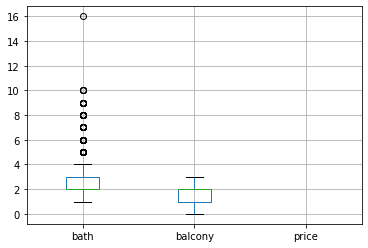

In [39]:
import matplotlib.pyplot as plt
Test.boxplot()

<Axes: >

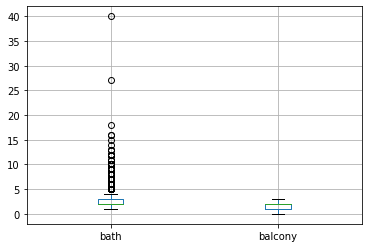

In [42]:
Train.drop('price', axis = 1).boxplot()